In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import plotly.graph_objs as go
import plotly.express as px
import graphviz
from google.colab import drive

In [3]:
warnings.filterwarnings('ignore')

In [10]:
#drive.mount('drive/my-drive')
data = '/content/drive/My Drive/Case1.csv'
df_1 = pd.read_csv(data, header=None)
data = '/content/drive/My Drive/Case2.csv'
df_2 = pd.read_csv(data, header=None)

,0,1,2
0,0.209358,0.827235,1
1,0.954759,0.783404,1
2,0.030470,0.860802,0
3,0.524250,0.920147,1
4,0.127654,0.296800,1
...,...,...,...
1995,0.712549,0.372931,1
1996,0.194550,0.304294,1
1997,0.985138,0.773623,0
1998,0.713637,0.700010,0


# Decision Trees

In [11]:
col_names = ['X1', 'X2', 'Y']
df_1.columns = col_names
df_2.columns = col_names

In [12]:
X1 = df_1.drop(['Y'], axis=1)
X2 = df_2.drop(['Y'], axis=1)
Y1 = df_1['Y']
Y2 = df_2['Y']

In [13]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.25)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.25)

In [14]:
fig = px.scatter(df_1, x="X1", y="X2", color="Y")
fig.show()

In [15]:
fig = px.scatter(df_2, x="X1", y="X2", color="Y")
fig.show()

In [16]:
from sklearn.tree import DecisionTreeClassifier
clf_1e_3 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_1e_10 = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)
clf_1g_3 = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_1g_10 = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=0)

clf_2e_3 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_2e_10 = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)
clf_2g_3 = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_2g_10 = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=0)

In [ ]:
clf_1e_3.fit(X1_train, Y1_train)
clf_1e_10.fit(X1_train, Y1_train)
clf_1g_3.fit(X1_train, Y1_train)
clf_1g_10.fit(X1_train, Y1_train)

clf_2e_3.fit(X2_train, Y2_train)
clf_2e_10.fit(X2_train, Y2_train)
clf_2g_3.fit(X2_train, Y2_train)
clf_2g_10.fit(X2_train, Y2_train)

In [18]:
y_test_1e_3 = clf_1e_3.predict(X1_test)
y_test_1e_10 = clf_1e_10.predict(X1_test)
y_test_1g_3 = clf_1g_3.predict(X1_test)
y_test_1g_10 = clf_1g_10.predict(X1_test)

y_test_2e_3 = clf_2e_3.predict(X2_test)
y_test_2e_10 = clf_2e_10.predict(X2_test)
y_test_2g_3 = clf_2g_3.predict(X2_test)
y_test_2g_10 = clf_2g_10.predict(X2_test)

y_train_1e_3 = clf_1e_3.predict(X1_train)
y_train_1e_10 = clf_1e_10.predict(X1_train)
y_train_1g_3 = clf_1g_3.predict(X1_train)
y_train_1g_10 = clf_1g_10.predict(X1_train)

y_train_2e_3 = clf_2e_3.predict(X2_train)
y_train_2e_10 = clf_2e_10.predict(X2_train)
y_train_2g_3 = clf_2g_3.predict(X2_train)
y_train_2g_10 = clf_2g_10.predict(X2_train)

In [19]:
test_1e_3 = X1_test.join(pd.DataFrame(data=y_test_1e_3, index=X1_test.index, columns=["Y"]))
test_1e_10 = X1_test.join(pd.DataFrame(data=y_test_1e_10, index=X1_test.index, columns=["Y"]))
test_1g_3 = X1_test.join(pd.DataFrame(data=y_test_1g_3, index=X1_test.index, columns=["Y"]))
test_1g_10 = X1_test.join(pd.DataFrame(data=y_test_1g_10, index=X1_test.index, columns=["Y"]))

test_2e_3 = X2_test.join(pd.DataFrame(data=y_test_2e_3, index=X2_test.index, columns=["Y"]))
test_2e_10 = X2_test.join(pd.DataFrame(data=y_test_2e_10, index=X2_test.index, columns=["Y"]))
test_2g_3 = X2_test.join(pd.DataFrame(data=y_test_2g_3, index=X2_test.index, columns=["Y"]))
test_2g_10 = X2_test.join(pd.DataFrame(data=y_test_2g_10, index=X2_test.index, columns=["Y"]))

In [20]:
from sklearn.metrics import accuracy_score

print('Accuracy index (entropy, max depth = 3):')
print('test({0:0.4f})'. format(accuracy_score(Y1_test, y_test_1e_3)))
print('train({0:0.4f})'. format(accuracy_score(Y1_train, y_train_1e_3)))

print('Accuracy index (entropy, max depth = 10):')
print('test({0:0.4f})'. format(accuracy_score(Y1_test, y_test_1e_10)))
print('train({0:0.4f})'. format(accuracy_score(Y1_train, y_train_1e_10)))

print('Accuracy index (gini, max depth = 3):')
print('test({0:0.4f})'. format(accuracy_score(Y1_test, y_test_1g_3)))
print('train({0:0.4f})'. format(accuracy_score(Y1_train, y_train_1g_3)))

print('Accuracy index (gini, max depth = 10):')
print('test({0:0.4f})'. format(accuracy_score(Y1_test, y_test_1g_10)))
print('train({0:0.4f})'. format(accuracy_score(Y1_train, y_train_1g_10)))

print('Accuracy C2 index (entropy, max depth = 3):')
print('test({0:0.4f})'. format(accuracy_score(Y2_test, y_test_2e_3)))
print('train({0:0.4f})'. format(accuracy_score(Y2_train, y_train_2e_3)))

print('Accuracy C2 index (entropy, max depth = 10):')
print('test({0:0.4f})'. format(accuracy_score(Y2_test, y_test_2e_10)))
print('train({0:0.4f})'. format(accuracy_score(Y2_train, y_train_2e_10)))

print('Accuracy C2 index (gini, max depth = 3):')
print('test({0:0.4f})'. format(accuracy_score(Y2_test, y_test_2g_3)))
print('train({0:0.4f})'. format(accuracy_score(Y2_train, y_train_2g_3)))

print('Accuracy C2 index (gini, max depth = 10):')
print('test({0:0.4f})'. format(accuracy_score(Y2_test, y_test_2g_10)))
print('train({0:0.4f})'. format(accuracy_score(Y2_train, y_train_2g_10)))

Accuracy index (entropy, max depth = 3):
test(0.8600)
train(0.8787)
Accuracy index (entropy, max depth = 10):
test(0.9620)
train(1.0000)
Accuracy index (gini, max depth = 3):
test(0.8640)
train(0.8853)
Accuracy index (gini, max depth = 10):
test(0.9540)
train(1.0000)
Accuracy C2 index (entropy, max depth = 3):
test(0.7680)
train(0.8153)
Accuracy C2 index (entropy, max depth = 10):
test(0.8040)
train(0.9420)
Accuracy C2 index (gini, max depth = 3):
test(0.7480)
train(0.8173)
Accuracy C2 index (gini, max depth = 10):
test(0.7960)
train(0.9407)


In [31]:
fig = px.scatter(test_1g_3, x="X1", y="X2", color="Y")
fig.show()

In [23]:
from sklearn import tree


In [26]:
#viz = dtreeviz(clf_1e_3, X1, Y1,
#                target_name="Y"
#                )
#viz

data1 = tree.export_graphviz(clf_1e_10, out_file=None, filled=True)

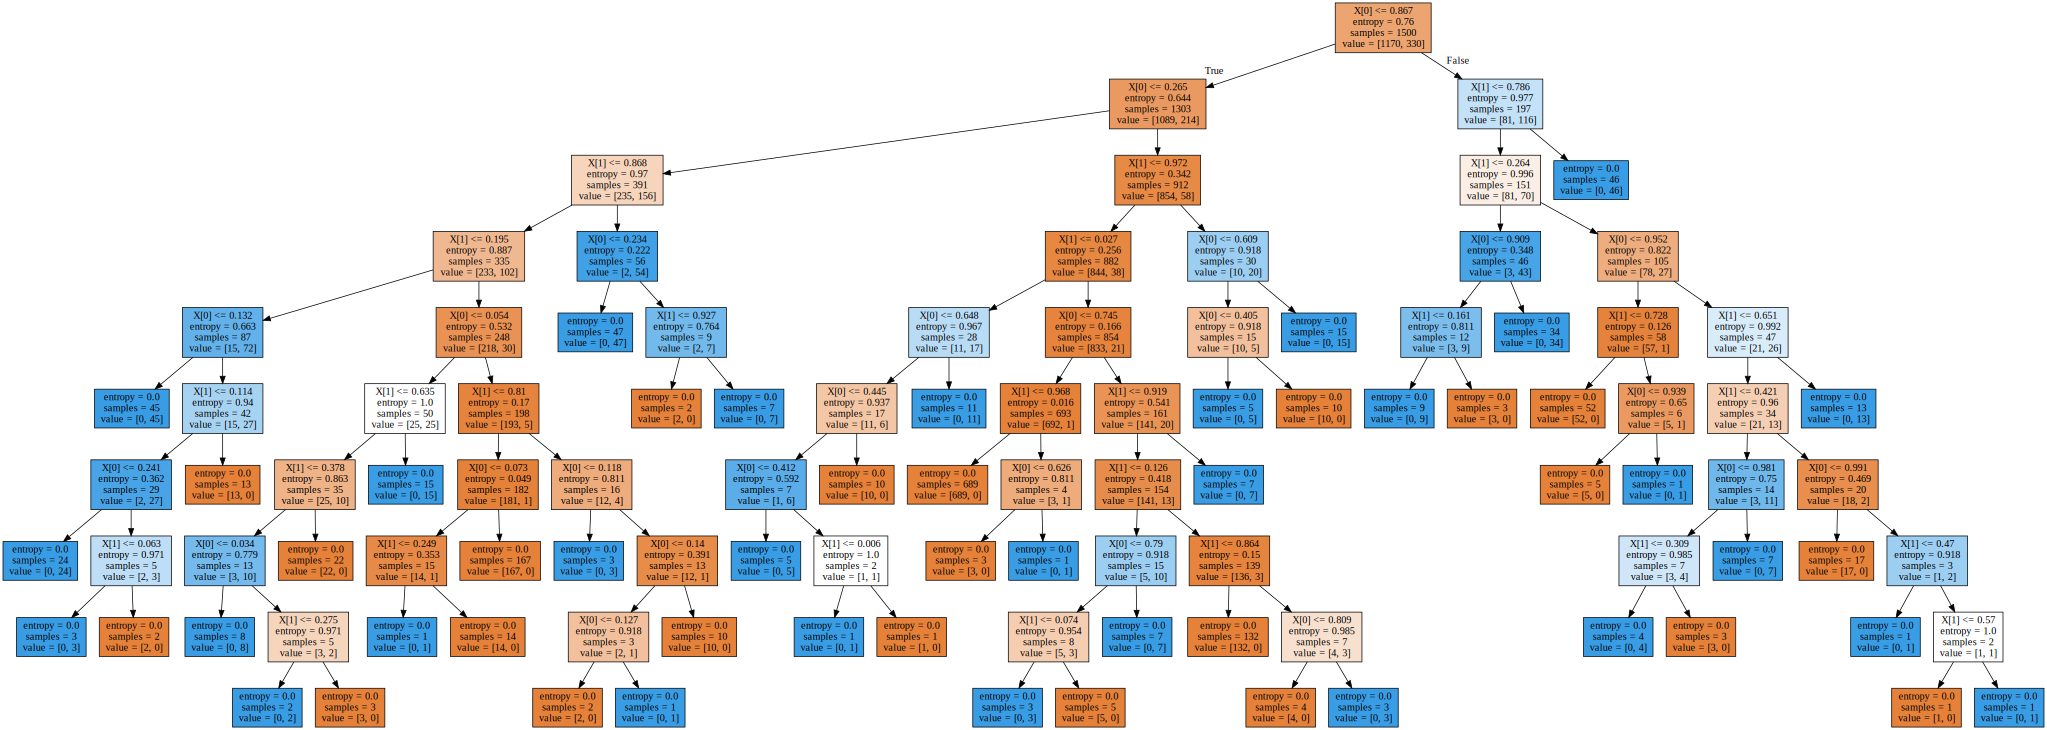

In [27]:
graph = graphviz.Source(data1, format="png") 
graph